In [3]:
# from show_result import *

In [133]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

quang_contours = []
quang_indexs = []

def mask_to_rgb(mask,rgb,color=np.array([142,0,0]),add_color=np.array([100,0,0])):
    """
    Add a mask on object in RGB object
        mask: segmented mask (numpy array)
        rbg: RGB image (numpy array)
        color: color pre-assigned to a class
        add_color: color want to add to object
    """
    x_indices, y_indices = np.where(np.all(mask == color, axis=-1))
    masked_rgb = rgb.copy()
    for i,j in zip(x_indices,y_indices):
        masked_rgb[i,j,:] = masked_rgb[i,j,:] + add_color
    return masked_rgb

def to_one_class_mask(mask,color=np.array([142,0,0])):
    x_indices, y_indices = np.where(np.all(mask == color, axis=-1))
    one_class_mask = np.zeros(mask.shape)
    for i,j in zip(x_indices,y_indices):
        one_class_mask[i,j,:] = one_class_mask[i,j,:] + color
    return one_class_mask

def find_contours(mask):
    h,w = mask.shape[:2]
    img = mask.copy()
    img = np.uint8(img)
    ret, thresh = cv2.threshold(img, 100, 255, 0)
    edged = cv2.Canny(thresh, 30, 200)
    contours, hierarchy = cv2.findContours(edged,
        cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE) 
    return contours

def find_boxes(contours):
    boxes = []
    for contour in contours:
        boxes.append(cv2.boundingRect(contour)) # x,y,w,h
    return boxes

def filter_contours(contours,boxes,percent=15):
    '''    
    Filter out contours < percent(%) and turn contours into hull
    '''
    areas = []
    new_contours = []
    new_boxes = []
    for contour in contours:
        hull = cv2.convexHull(contour)
        areas.append(cv2.contourArea(hull))
    areas = np.array(areas)
    threshold = np.percentile(areas, percent)
    indexs = (areas>=threshold)
    indexs = np.where(indexs==True)[0]
    for index in indexs:
        new_contours.append(contours[index])
        new_boxes.append(boxes[index])
    return new_contours,new_boxes
    
def find_objects(mask):
    contours = find_contours(mask)
    boxes = find_boxes(contours)
    contours, boxes = filter_contours(contours,boxes)
    objects = []
    h,w = mask.shape[:2]
    
    for contour,box in zip(contours,boxes):
        object_ = []
        hull = contour
        x,y,w,h = box
        for i in range(w):
            for j in range(h):
                if cv2.pointPolygonTest(hull, (x+i,y+j), False)!=-1:
                    object_.append((x+i,y+j))
        objects.append(object_)
    return objects

def find_distances(objects,depth,method='mean'):
    distances = []
    for object_ in objects:
        if method == 'mean':
            n = len(object_)
            mean_dist = 0
            for y,x in object_:
                mean_dist += depth[x,y]
            mean_dist = mean_dist/n
            distances.append(mean_dist)
        elif method == 'min':
            min_dist = 100
            for y,x in object_:
                if depth[x,y]<min_dist:
                    min_dist = depth[x,y]
            distances.append(min_dist)
    return distances

def show_distances(objects,rgb,distances,mask):
    locations = []
    for object_ in objects:
        object_ = np.array(object_)
        locations.append((int(np.mean(object_[:,0])),int(np.mean(object_[:,1]))))
    new_rgb = mask_to_rgb(mask,rgb)

    # Using cv2.putText() method 
    for loc,dist in zip(locations,distances):
        new_rgb = cv2.putText(new_rgb, str(np.round(dist,2)), loc, cv2.FONT_HERSHEY_SIMPLEX ,  
                       1, (0, 255, 0) , 2, cv2.LINE_AA) 
    return new_rgb

def to_rgb_with_distances(rgb,mask,depth):
    h,w = depth.shape
    rgb = cv2.resize(rgb,(w,h))
    mask = cv2.resize(mask,(w,h))
    one_class_mask = to_one_class_mask(mask)
    objects = find_objects(one_class_mask)
    distances = find_distances(objects,depth)
    rgb_with_distances = show_distances(objects,rgb,distances,one_class_mask)
    return rgb_with_distances

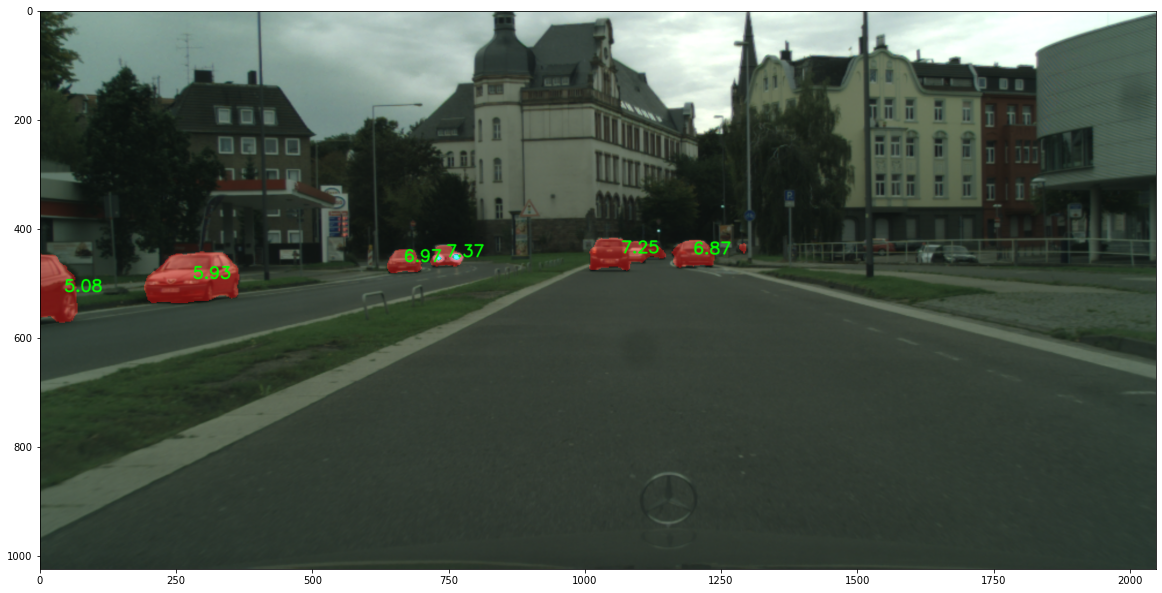

In [137]:
rgb = cv2.imread('rgb.png')
rgb = rgb[:,:,::-1]
mask = cv2.imread('mask.png')
mask = mask[:,:,::-1]
depth = np.load('depth.npy')

# areas = []
new_rgb = to_rgb_with_distances(rgb,mask,depth)
# h,w = depth.shape
# rgb = cv2.resize(rgb,(w,h))
# mask = cv2.resize(mask,(w,h))
# one_class_mask = to_one_class_mask(mask)
# contours = find_contours(one_class_mask)
# boxes = find_boxes(contours)
# objects = find_objects(one_class_mask)
plt.figure(figsize=(20,20))
plt.imshow(new_rgb)

In [123]:
rgb = cv2.imread('rgb.png')
rgb = rgb[:,:,::-1]
mask = cv2.imread('mask.png')
mask = mask[:,:,::-1]
depth = np.load('depth.npy')

# areas = []
# new_rgb = to_rgb_with_distances(rgb,mask,depth)
h,w = depth.shape
rgb = cv2.resize(rgb,(w,h))
mask = cv2.resize(mask,(w,h))
one_class_mask = to_one_class_mask(mask)
contours = find_contours(one_class_mask)
boxes = find_boxes(contours)
# objects = find_objects(one_class_mask)
# plt.figure(figsize=(20,20))
# plt.imshow(new_rgb)

In [134]:
a,b=filter_contour(contours,boxes)

In [135]:
a

[array([[[  0, 444]],
 
        [[  1, 444]],
 
        [[  2, 445]],
 
        [[  3, 446]],
 
        [[  4, 446]],
 
        [[  5, 446]],
 
        [[  6, 446]],
 
        [[  7, 446]],
 
        [[  8, 446]],
 
        [[  9, 446]],
 
        [[ 10, 446]],
 
        [[ 11, 446]],
 
        [[ 12, 446]],
 
        [[ 13, 446]],
 
        [[ 14, 446]],
 
        [[ 15, 446]],
 
        [[ 16, 446]],
 
        [[ 17, 446]],
 
        [[ 18, 446]],
 
        [[ 19, 446]],
 
        [[ 20, 446]],
 
        [[ 21, 446]],
 
        [[ 22, 446]],
 
        [[ 23, 446]],
 
        [[ 24, 447]],
 
        [[ 25, 447]],
 
        [[ 26, 447]],
 
        [[ 27, 447]],
 
        [[ 28, 448]],
 
        [[ 29, 449]],
 
        [[ 30, 450]],
 
        [[ 31, 451]],
 
        [[ 32, 452]],
 
        [[ 32, 453]],
 
        [[ 32, 454]],
 
        [[ 33, 455]],
 
        [[ 34, 456]],
 
        [[ 34, 457]],
 
        [[ 34, 458]],
 
        [[ 35, 459]],
 
        [[ 36, 460]],
 
        [[ 37, 4

In [127]:
boxes[0]

(0, 444, 69, 128)

In [99]:
indexs = np.array([True,False,True,False,True,False,True])

In [119]:
np.where(indexs==True)[0][0]

0

In [113]:
len(indexs)

7

In [114]:
int_indexs = indexs*np.arange(1,8)-

In [116]:
indexs*np.arange(1,8)

array([1, 0, 3, 0, 5, 0, 7])

In [100]:
new_indexs = indexs.astype(int)

In [104]:
int(new_indexs)

TypeError: only size-1 arrays can be converted to Python scalars

In [88]:
int_indexs = np.where(indexs==True)

In [94]:
int_indexs = np.array(int_indexs[0])

In [98]:
int_indexs

array([0, 2, 4, 6], dtype=int64)

In [107]:
new_contours = contours[1]

In [102]:
new_contours = contours[new_indexs]

TypeError: only integer scalar arrays can be converted to a scalar index

In [64]:
quang_contours

[]

In [44]:
quang_indexs

[]

In [27]:
areas=np.array(areas)

In [28]:
areas

array([ 7249.5, 13865. ,  2313. ,  1879. ,   184.5,  3302. ,  6650.5])

In [29]:
threshold = np.percentile(areas, 15)

In [30]:
indexs = (areas>=threshold)

In [31]:
indexs

array([ True,  True,  True,  True, False,  True,  True])

In [32]:
new = areas[indexs]

In [33]:
new

array([ 7249.5, 13865. ,  2313. ,  1879. ,  3302. ,  6650.5])